<a href="https://colab.research.google.com/github/LTPDat/AI/blob/main/W7_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #Để chuyển thành one hot encoding
from keras.models import load_model
from keras.utils import load_img
import numpy as np

#MNIST

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

So nay la:  5


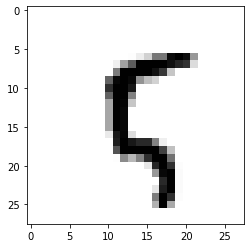

In [ ]:
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print("So nay la: ", train_labels[100])

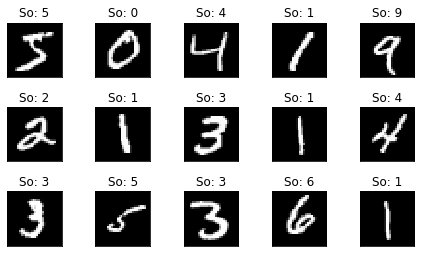

In [ ]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title('So: {}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
model = Sequential()
model.add(Dense(512,input_shape = (784,), activation='relu', name="Layer_1"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_images = train_images.reshape((60000,28*28)) #Chuyển về input 1 chiều
train_images = train_images.astype('float32')/255 #Ảnh có giá trị 0-->255, Scale xuống thành 0-->1
test_images =  test_images.reshape((10000,28*28)) #Chuyển về input 1 chiều
test_images = test_images.astype('float32')/255
train_images.shape

(60000, 784)

In [ ]:
train_labels = to_categorical(train_labels, 10) #One hot encoding
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)#, validation_split = 0.1)

Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.2627 - accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1079 - accuracy: 0.9688
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0715 - accuracy: 0.9784
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0387 - accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0292 - accuracy: 0.9914
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0217 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0166 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0124 - accuracy: 0.9968
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0091 - accur

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_accuracy",test_acc)
print("test_loss", test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0635 - accuracy: 0.9814
test_accuracy 0.9814000129699707
test_loss 0.06354732066392899


In [ ]:
model.save('model1.h5')
model11 = load_model('model1.h5')

1/1 [==============================] - 0s 37ms/step
[9 6 6 5 4 0 7 4 0 1 3 1 3 4 7]


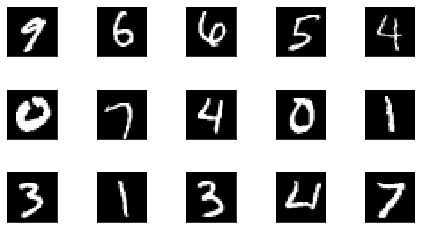

In [ ]:
x_sample = test_images[20:35]
print(np.argmax(model.predict(x_sample), axis=-1))
x_sample = np.reshape(x_sample, (15,28, 28,1))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_sample[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])